In [1]:
## Importing Librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
from datetime import datetime

C:\Users\MOHIT\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
## Reading The files 
price = pd.read_csv('^BSESN.csv')
sent = pd.read_csv('india-news-headlines.csv')

In [3]:
#Changing columns to lowercase
price.columns= price.columns.str.lower()

In [4]:
#Edting Number of Diaplyed Rows and Columns

pd.set_option("display.max_rows", 99)
pd.set_option("display.max_columns", 99)

In [5]:
#Gathering info on dataset

sent.info()
type(sent.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   publish_date       1048574 non-null  int64 
 1   headline_category  1048574 non-null  object
 2   headline_text      1048574 non-null  object
dtypes: int64(1), object(2)
memory usage: 24.0+ MB


pandas.core.indexes.base.Index

In [6]:
#Adding Index as a column in dataset

sent['index'] = sent.index

In [7]:
sent.tail()

,publish_date,headline_category,headline_text,index
1048569,20110207,sports.icc-world-cup-2015,Banned trio summoned by Pakistan govt over fix...,1048569
1048570,20110207,sports.more-sports.others,Nadal pips Messi to bag Laureus 'World Sportsm...,1048570
1048571,20110207,city.patna,Central team to visit Kutku dam in Bihar,1048571
1048572,20110207,city.bhubaneswar,Red bandh evokes lukewarm response,1048572
1048573,20110207,city.bhubaneswar,De-worming drug for tribal children,1048573


In [8]:
sent['publish_date'] = sent['publish_date'].astype(str) #for ease in joining

In [9]:
price['date'] = price['date'].astype(str) #for ease in joining

In [6]:
price = price.dropna()

# Filtering the Headlines Data

In [7]:
#Filtering only Relevant Columns

filter_list = ['business', 'business.india-business', 'business.international-business', 'business.personal-finance']
sent_2 = sent[sent.headline_category.isin(filter_list)]

In [8]:
sent_2.reset_index(inplace= True)

# Sentiment Analysis Using Vader

In [9]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['publish_date', 'headline_category', 'headline_text']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(sent_2, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline_text'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['publish_date'] = pd.to_datetime(parsed_and_scored_news.publish_date).dt.date

parsed_and_scored_news.head()

,publish_date,headline_category,headline_text,neg,neu,pos,compound
0,1970-01-01,business.india-business,Car dealers caught in Bihar sales tax ruling,0.0,1.000,0.000,0.0000
1,1970-01-01,business.india-business,Re-negotiation best: Deshmukh; lenders' SOS to...,0.0,0.588,0.412,0.6369
2,1970-01-01,business.india-business,Samsung says hello to cellular unit in India,0.0,1.000,0.000,0.0000
3,1970-01-01,business.india-business,Govt lifts port-linked curbs on imports,0.0,1.000,0.000,0.0000
4,1970-01-01,business.india-business,RIL plans to mop up to Rs 1;000cr,0.0,1.000,0.000,0.0000


In [112]:
#price.to_csv('price_f.csv') 

In [10]:
price_f = pd.read_csv('price_f.csv')

In [20]:
pf = pd.read_csv('Price_Final.csv')

In [21]:
data = pf.join(parsed_and_scored_news, lsuffix='_caller', rsuffix='_other')

In [22]:
data.head()

,date,open,close,high,low,adj_close,volume,publish_date,headline_category,headline_text,neg,neu,pos,compound
0,1/4/2001,4180.97,4115.37,4180.97,4109.54,4115.37,0,1970-01-01,business.india-business,Car dealers caught in Bihar sales tax ruling,0.0,1.000,0.000,0.0000
1,5/22/2001,3643.29,3640.60,3663.15,3630.03,3640.60,0,1970-01-01,business.india-business,Re-negotiation best: Deshmukh; lenders' SOS to...,0.0,0.588,0.412,0.6369
2,5/22/2001,3643.29,3640.60,3663.15,3630.03,3640.60,0,1970-01-01,business.india-business,Samsung says hello to cellular unit in India,0.0,1.000,0.000,0.0000
3,5/22/2001,3643.29,3640.60,3663.15,3630.03,3640.60,0,1970-01-01,business.india-business,Govt lifts port-linked curbs on imports,0.0,1.000,0.000,0.0000
4,5/22/2001,3643.29,3640.60,3663.15,3630.03,3640.60,0,1970-01-01,business.india-business,RIL plans to mop up to Rs 1;000cr,0.0,1.000,0.000,0.0000


# Filtering Data for Analysis

In [24]:
data_f = data.drop(['headline_text', 'publish_date','headline_category'], axis = 1)

In [25]:
data_f.head()

,date,open,close,high,low,adj_close,volume,neg,neu,pos,compound
0,1/4/2001,4180.97,4115.37,4180.97,4109.54,4115.37,0,0.0,1.000,0.000,0.0000
1,5/22/2001,3643.29,3640.60,3663.15,3630.03,3640.60,0,0.0,0.588,0.412,0.6369
2,5/22/2001,3643.29,3640.60,3663.15,3630.03,3640.60,0,0.0,1.000,0.000,0.0000
3,5/22/2001,3643.29,3640.60,3663.15,3630.03,3640.60,0,0.0,1.000,0.000,0.0000
4,5/22/2001,3643.29,3640.60,3663.15,3630.03,3640.60,0,0.0,1.000,0.000,0.0000


In [19]:
data_f.to_csv('data_f.csv',index=False)

In [26]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [27]:
data_f = pd.read_csv('data_f.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [21]:
#data_f.index = data_f.date
#data_f = data_f.drop(['date'] , axis=1)

In [22]:
#ata_f['date']= pd.to_datetime(data.date).dt.date

In [28]:
data_f.head()

,open,close,high,low,adj_close,volume,index,neg,neu,pos,compound
date,,,,,,,,,,,
2001-01-04,4180.97,4115.37,4180.97,4109.54,4115.37,0.0,275.0,0.0,1.000,0.000,0.0000
2001-05-22,3643.29,3640.60,3663.15,3630.03,3640.60,0.0,4499.0,0.0,0.588,0.412,0.6369
2001-05-22,3643.29,3640.60,3663.15,3630.03,3640.60,0.0,4566.0,0.0,1.000,0.000,0.0000
2001-05-22,3643.29,3640.60,3663.15,3630.03,3640.60,0.0,4573.0,0.0,1.000,0.000,0.0000
2001-05-22,3643.29,3640.60,3663.15,3630.03,3640.60,0.0,4586.0,0.0,1.000,0.000,0.0000


# Analysis

We use VAR method for prediction of stocks since we have a time series data which is multivariate in nature

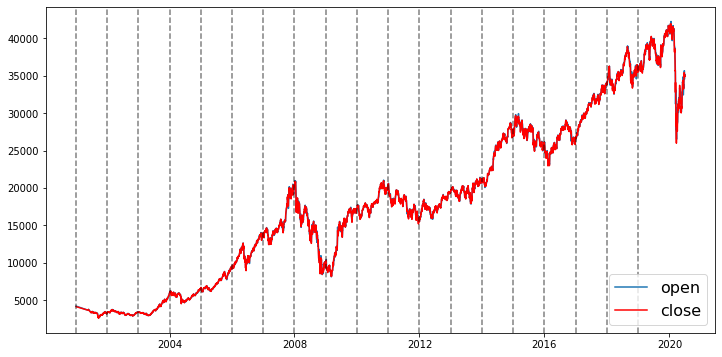

In [31]:
plt.figure(figsize=(12,6))
open_price, = plt.plot(data_f['open'])
close, = plt.plot(data_f['close'], color='red')

for year in range(2001, 2020):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.legend(['open', 'close'], fontsize=16)
plt.show()

## Normalize The Data

In [32]:
avgs = data_f.mean()
devs = data_f.std()

In [33]:
for col in data_f.columns:
    data_f[col] = (data_f[col] - avgs.loc[col]) / devs.loc[col]

C:\Users\MOHIT\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


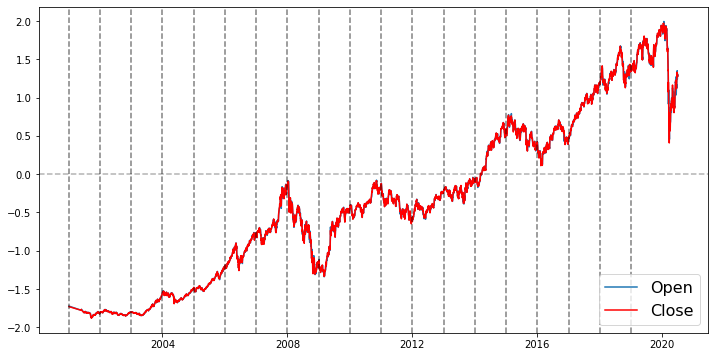

In [34]:
plt.figure(figsize=(12,6))
open_price, = plt.plot(data_f['open'])
close, = plt.plot(data_f['close'], color='red')

for year in range(2001, 2020):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

plt.legend(['Open', 'Close'], fontsize=16)

## Taking First Difference to Remove Trend

In [35]:
data_f = data_f.diff().dropna()


In [36]:
data_f.head()

,open,close,high,low,adj_close,volume,index,neg,neu,pos,compound
date,,,,,,,,,,,
2001-05-22,-0.052501,-0.046425,-0.050474,-0.047003,-0.046425,0.0,0.014866,0.000000,-2.232853,2.804417,2.525018
2001-05-22,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000236,0.000000,2.232853,-2.804417,-2.525018
2001-05-22,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000025,0.000000,0.000000,0.000000,0.000000
2001-05-22,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000046,0.000000,0.000000,0.000000,0.000000
2001-05-22,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000032,1.602766,-1.127266,0.000000,-1.083113


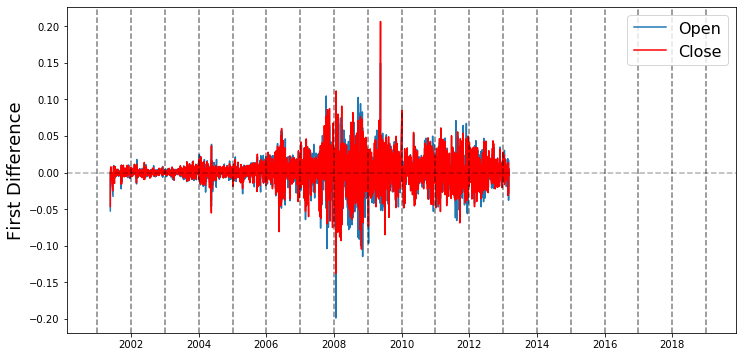

In [37]:
plt.figure(figsize=(12,6))
open_price, = plt.plot(data_f['open'])
close, = plt.plot(data_f['close'], color='red')

for year in range(2001, 2020):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['Open', 'Close'], fontsize=16)

## Remove Increasing Volatility

In [39]:
annual_volatility = data_f.groupby(data_f.index.year).std()

In [40]:
list(annual_volatility.columns)

['open',
 'close',
 'high',
 'low',
 'adj_close',
 'volume',
 'index',
 'neg',
 'neu',
 'pos',
 'compound']

In [41]:
data_f['open_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'open'])
data_f['close_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'close'])
data_f['high_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'high'])
data_f['low_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'low'])
data_f['adj_close_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'adj_close'])
data_f['volume_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'volume'])
data_f['neg_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'neg'])
data_f['neu_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'neu'])
data_f['pos_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'pos'])
data_f['compound_annual_vol'] = data_f.index.map(lambda d: annual_volatility.loc[d.year, 'compound'])

In [42]:
data_f

,open,close,high,low,adj_close,volume,index,neg,neu,pos,compound,open_annual_vol,close_annual_vol,high_annual_vol,low_annual_vol,adj_close_annual_vol,volume_annual_vol,neg_annual_vol,neu_annual_vol,pos_annual_vol,compound_annual_vol
date,,,,,,,,,,,,,,,,,,,,,
2001-05-22,-0.052501,-0.046425,-0.050474,-0.047003,-0.046425,0.0,0.014866,0.000000,-2.232853,2.804417,2.525018,0.001704,0.001577,0.001656,0.001570,0.001577,0.000000,1.559483,1.457437,1.386058,1.392837
2001-05-22,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000236,0.000000,2.232853,-2.804417,-2.525018,0.001704,0.001577,0.001656,0.001570,0.001577,0.000000,1.559483,1.457437,1.386058,1.392837
2001-05-22,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000025,0.000000,0.000000,0.000000,0.000000,0.001704,0.001577,0.001656,0.001570,0.001577,0.000000,1.559483,1.457437,1.386058,1.392837
2001-05-22,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000046,0.000000,0.000000,0.000000,0.000000,0.001704,0.001577,0.001656,0.001570,0.001577,0.000000,1.559483,1.457437,1.386058,1.392837
2001-05-22,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000032,1.602766,-1.127266,0.000000,-1.083113,0.001704,0.001577,0.001656,0.001570,0.001577,0.000000,1.559483,1.457437,1.386058,1.392837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000123,0.000000,1.804709,-2.266677,-1.431993,0.002436,0.002262,0.001897,0.002058,0.002262,0.000632,1.480018,1.411606,1.330985,1.469407
2013-03-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000070,0.000000,-1.468697,1.844653,1.513663,0.002436,0.002262,0.001897,0.002058,0.002262,0.000632,1.480018,1.411606,1.330985,1.469407
2013-03-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000004,0.000000,1.468697,-1.844653,-1.513663,0.002436,0.002262,0.001897,0.002058,0.002262,0.000632,1.480018,1.411606,1.330985,1.469407


In [50]:
data_f['open'] = data_f['open'] / data_f['open_annual_vol']
data_f['close'] = data_f['close'] / data_f['close_annual_vol']
data_f['high'] = data_f['high'] / data_f['high_annual_vol']
data_f['low'] = data_f['low'] / data_f['low_annual_vol']
data_f['adj_close'] = data_f['adj_close'] / data_f['adj_close_annual_vol']
data_f['volume'] = data_f['volume'] / data_f['volume_annual_vol']
data_f['neg'] = data_f['neg'] / data_f['neg_annual_vol']
data_f['neu'] = data_f['neu'] / data_f['neu_annual_vol']
data_f['pos'] = data_f['pos'] / data_f['pos_annual_vol']
data_f['compound'] = data_f['compound'] / data_f['compound_annual_vol']

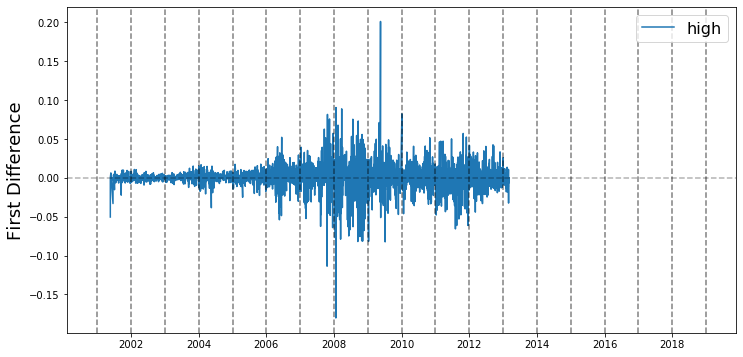

In [48]:
plt.figure(figsize=(12,6))
ice_cream, = plt.plot(data_f['high'])

for year in range(2001, 2020):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['high'], fontsize=16)

##  Remove Seasonality

In [51]:
month_avgs = data_f.groupby(data_f.index.month).mean()

In [52]:
print(month_avgs)

              open      close       high        low  adj_close     volume  \
date                                                                        
1      2720.208536   1.508871   2.956962   2.511409   1.508871   8.480541   
2     11261.965494   3.957187  12.290110   4.268868   3.957187   9.367757   
3    -10633.091779  -4.766043 -15.281562  -4.834040  -4.766043 -14.083623   
4     -7446.651785  -4.694058  -7.838292  -6.169263  -4.694058  -7.030703   
5     -6896.772083 -12.996645 -15.669227 -13.208685 -12.996645   4.414056   
6      6956.201423  13.015392  17.035793  14.766128  13.015392  -1.455349   
7     -4088.421919  -1.805407  -0.461321  -2.842146  -1.805407   5.474664   
8      8111.559510  11.391266  15.053470  12.869920  11.391266  -0.976258   
9       338.461466   5.874112  11.331360   7.680897   5.874112   1.975094   
10      760.491486   6.040599   6.819169   3.525275   6.040599  -0.300890   
11    15279.603413  19.329907  25.373535  22.561096  19.329907  -1.563688   

In [54]:
data_f['open_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'open'])
data_f['close_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'close'])
data_f['high_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'high'])
data_f['low_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'low'])
data_f['adj_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'adj_close'])
data_f['volume_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'volume'])
data_f['neg_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'neg'])
data_f['neu_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'neu'])
data_f['pos_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'pos'])
data_f['compound_month_avg'] = data_f.index.map(lambda d: month_avgs.loc[d.month, 'compound'])

In [55]:
data_f

,open,close,high,low,adj_close,volume,index,neg,neu,pos,compound,open_annual_vol,close_annual_vol,high_annual_vol,low_annual_vol,adj_close_annual_vol,volume_annual_vol,neg_annual_vol,neu_annual_vol,pos_annual_vol,compound_annual_vol,open_month_avg,close_month_avg,high_month_avg,low_month_avg,adj_month_avg,volume_month_avg,neg_month_avg,neu_month_avg,pos_month_avg,compound_month_avg
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-05-22,-1.060773e+07,-18664.556391,-18404.639604,-19077.382024,-18664.556391,NaN,0.014866,0.000000,-1.532040,2.023305,1.812859,0.001704,0.001577,0.001656,0.001570,0.001577,0.000000,1.559483,1.457437,1.386058,1.392837,-6896.772083,-12.996645,-15.669227,-13.208685,-12.996645,4.414056,0.000179,0.000031,-0.000205,-0.000448
2001-05-22,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,0.000236,0.000000,1.532040,-2.023305,-1.812859,0.001704,0.001577,0.001656,0.001570,0.001577,0.000000,1.559483,1.457437,1.386058,1.392837,-6896.772083,-12.996645,-15.669227,-13.208685,-12.996645,4.414056,0.000179,0.000031,-0.000205,-0.000448
2001-05-22,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,0.000025,0.000000,0.000000,0.000000,0.000000,0.001704,0.001577,0.001656,0.001570,0.001577,0.000000,1.559483,1.457437,1.386058,1.392837,-6896.772083,-12.996645,-15.669227,-13.208685,-12.996645,4.414056,0.000179,0.000031,-0.000205,-0.000448
2001-05-22,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,0.000046,0.000000,0.000000,0.000000,0.000000,0.001704,0.001577,0.001656,0.001570,0.001577,0.000000,1.559483,1.457437,1.386058,1.392837,-6896.772083,-12.996645,-15.669227,-13.208685,-12.996645,4.414056,0.000179,0.000031,-0.000205,-0.000448
2001-05-22,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,0.000032,1.027755,-0.773457,0.000000,-0.777631,0.001704,0.001577,0.001656,0.001570,0.001577,0.000000,1.559483,1.457437,1.386058,1.392837,-6896.772083,-12.996645,-15.669227,-13.208685,-12.996645,4.414056,0.000179,0.000031,-0.000205,-0.000448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000123,0.000000,1.278479,-1.703008,-0.974538,0.002436,0.002262,0.001897,0.002058,0.002262,0.000632,1.480018,1.411606,1.330985,1.469407,-10633.091779,-4.766043,-15.281562,-4.834040,-4.766043,-14.083623,-0.000922,0.001016,-0.000518,-0.000088
2013-03-04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000070,0.000000,-1.040444,1.385931,1.030118,0.002436,0.002262,0.001897,0.002058,0.002262,0.000632,1.480018,1.411606,1.330985,1.469407,-10633.091779,-4.766043,-15.281562,-4.834040,-4.766043,-14.083623,-0.000922,0.001016,-0.000518,-0.000088
2013-03-04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.000004,0.000000,1.040444,-1.385931,-1.030118,0.002436,0.002262,0.001897,0.002058,0.002262,0.000632,1.480018,1.411606,1.330985,1.469407,-10633.091779,-4.766043,-15.281562,-4.834040,-4.766043,-14.083623,-0.000922,0.001016,-0.000518,-0.000088


In [57]:
data_f['open'] = data_f['open'] - data_f['open_month_avg']
data_f['close'] = data_f['close'] - data_f['close_month_avg']
data_f['high'] = data_f['high'] - data_f['high_month_avg']
data_f['low'] = data_f['low'] - data_f['low_month_avg']
data_f['adj_close'] = data_f['adj_close'] - data_f['adj_month_avg']
data_f['volume'] = data_f['volume'] - data_f['volume_month_avg']
data_f['neg'] = data_f['neg'] - data_f['neg_month_avg']
data_f['neu'] = data_f['neu'] - data_f['neu_month_avg']
data_f['pos'] = data_f['pos'] - data_f['pos_month_avg']
data_f['compound'] = data_f['compound'] - data_f['compound_month_avg']

In [58]:
data_f

,open,close,high,low,adj_close,volume,index,neg,neu,pos,compound,open_annual_vol,close_annual_vol,high_annual_vol,low_annual_vol,adj_close_annual_vol,volume_annual_vol,neg_annual_vol,neu_annual_vol,pos_annual_vol,compound_annual_vol,open_month_avg,close_month_avg,high_month_avg,low_month_avg,adj_month_avg,volume_month_avg,neg_month_avg,neu_month_avg,pos_month_avg,compound_month_avg
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-05-22,-1.059394e+07,-18638.563102,-18373.301150,-19050.964653,-18651.559746,NaN,0.014866,-0.000179,-1.532072,2.023509,1.813307,0.001704,0.001577,0.001656,0.001570,0.001577,0.000000,1.559483,1.457437,1.386058,1.392837,-6896.772083,-12.996645,-15.669227,-13.208685,-12.996645,4.414056,0.000179,0.000031,-0.000205,-0.000448
2001-05-22,1.379354e+04,25.993289,31.338454,26.417370,12.996645,NaN,0.000236,-0.000179,1.532009,-2.023100,-1.812411,0.001704,0.001577,0.001656,0.001570,0.001577,0.000000,1.559483,1.457437,1.386058,1.392837,-6896.772083,-12.996645,-15.669227,-13.208685,-12.996645,4.414056,0.000179,0.000031,-0.000205,-0.000448
2001-05-22,1.379354e+04,25.993289,31.338454,26.417370,12.996645,NaN,0.000025,-0.000179,-0.000031,0.000205,0.000448,0.001704,0.001577,0.001656,0.001570,0.001577,0.000000,1.559483,1.457437,1.386058,1.392837,-6896.772083,-12.996645,-15.669227,-13.208685,-12.996645,4.414056,0.000179,0.000031,-0.000205,-0.000448
2001-05-22,1.379354e+04,25.993289,31.338454,26.417370,12.996645,NaN,0.000046,-0.000179,-0.000031,0.000205,0.000448,0.001704,0.001577,0.001656,0.001570,0.001577,0.000000,1.559483,1.457437,1.386058,1.392837,-6896.772083,-12.996645,-15.669227,-13.208685,-12.996645,4.414056,0.000179,0.000031,-0.000205,-0.000448
2001-05-22,1.379354e+04,25.993289,31.338454,26.417370,12.996645,NaN,0.000032,1.027576,-0.773489,0.000205,-0.777183,0.001704,0.001577,0.001656,0.001570,0.001577,0.000000,1.559483,1.457437,1.386058,1.392837,-6896.772083,-12.996645,-15.669227,-13.208685,-12.996645,4.414056,0.000179,0.000031,-0.000205,-0.000448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-04,2.126618e+04,9.532087,30.563124,9.668080,4.766043,14.083623,0.000123,0.000922,1.277463,-1.702490,-0.974450,0.002436,0.002262,0.001897,0.002058,0.002262,0.000632,1.480018,1.411606,1.330985,1.469407,-10633.091779,-4.766043,-15.281562,-4.834040,-4.766043,-14.083623,-0.000922,0.001016,-0.000518,-0.000088
2013-03-04,2.126618e+04,9.532087,30.563124,9.668080,4.766043,14.083623,0.000070,0.000922,-1.041460,1.386449,1.030206,0.002436,0.002262,0.001897,0.002058,0.002262,0.000632,1.480018,1.411606,1.330985,1.469407,-10633.091779,-4.766043,-15.281562,-4.834040,-4.766043,-14.083623,-0.000922,0.001016,-0.000518,-0.000088
2013-03-04,2.126618e+04,9.532087,30.563124,9.668080,4.766043,14.083623,0.000004,0.000922,1.039428,-1.385413,-1.030030,0.002436,0.002262,0.001897,0.002058,0.002262,0.000632,1.480018,1.411606,1.330985,1.469407,-10633.091779,-4.766043,-15.281562,-4.834040,-4.766043,-14.083623,-0.000922,0.001016,-0.000518,-0.000088


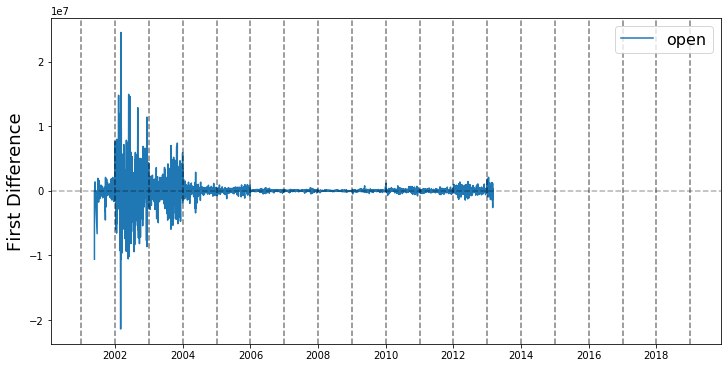

In [59]:
plt.figure(figsize=(12,6))
open_price, = plt.plot(data_f['open'])

for year in range(2001, 2020):
    plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)
    
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.ylabel('First Difference', fontsize=18)

plt.legend(['open'], fontsize=16)

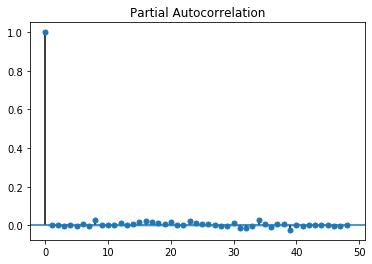

In [81]:
plot_pacf(data_f['high'])
plt.show()

## Fitting a VAR Model

In [66]:
data_f1 = data_f[['open' ,	'close', 	'high', 	'low', 	'adj_close' 	,'volume',	'neg', 	'neu' ,	'pos' ,	'compound']]

data_f2 = data_f1.dropna()

In [84]:
model = VAR(data_f2)

model_fit = model.fit(maxlags =7)

model_fit.summary()



C:\Users\MOHIT\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 20, Nov, 2020
Time:                     01:16:22
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    58.4565
Nobs:                     47752.0    HQIC:                   58.3670
Log likelihood:      -2.06945e+06    FPE:                2.14122e+25
AIC:                      58.3260    Det(Omega_mle):     2.10964e+25
--------------------------------------------------------------------
Results for equation open
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const             3169.790160       987.068123            3.211           0.001
L1.open              0.004716         0.008741            0.540           0.589
L1.close          1352.397183      1416.384563            0.955  

                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                3.295713         2.119985            1.555           0.120
L1.open              0.000004         0.000019            0.220           0.826
L1.close             2.074491         3.042054            0.682           0.495
L1.high             -0.003401         0.009161           -0.371           0.710
L1.low              -0.001836         0.010583           -0.173           0.862
L1.adj_close        -2.070996         3.042292           -0.681           0.496
L1.volume            0.000204         0.002601            0.079           0.937
L1.neg             -12.804629        35.663576           -0.359           0.720
L1.neu             -22.207325        50.634498           -0.439           0.661
L1.pos             -18.707850        41.150638           -0.455           0.649
L1.compound          3.540144         9.460904            0.374           0.708
L2.open              0.000043         0.000019            2.287           0.022
L2.close             0.073119         4.300117            0.017           0.986
L2.high             -0.016348         0.009161           -1.785           0.074
L2.low              -0.003697         0.010582           -0.349           0.727
L2.adj_close        -0.055205         4.300295           -0.013           0.990
L2.volume           -0.000935         0.002601           -0.359           0.719
L2.neg              -8.670984        46.618532           -0.186           0.852
L2.neu             -26.054785        66.213517           -0.393           0.694
L2.pos             -31.335832        53.810510           -0.582           0.560
L2.compound         11.312714        12.398757            0.912           0.362
L3.open              0.000003         0.000019            0.176           0.860
L3.close            -0.268215         4.300088           -0.062           0.950
L3.high             -0.023604         0.009161           -2.577           0.010
L3.low               0.015283         0.010582            1.444           0.149
L3.adj_close         0.286265         4.300266            0.067           0.947
L3.volume            0.002263         0.002601            0.870           0.384
L3.neg              -2.357215        52.083193           -0.045           0.964
L3.neu              -8.649144        74.030847           -0.117           0.907
L3.pos             -12.579187        60.210958           -0.209           0.835
L3.compound          2.340435        13.882903            0.169           0.866
L4.open              0.000002         0.000019            0.080           0.936
L4.close             0.854518         4.300478            0.199           0.842
L4.high             -0.002959         0.009161           -0.323           0.747
L4.low              -0.000749         0.010582           -0.071           0.944
L4.adj_close        -0.847452         4.300655           -0.197           0.844
L4.volume            0.000083         0.002601            0.032           0.975
L4.neg              -5.166099        53.826758           -0.096           0.924
L4.neu             -11.232929        76.523030           -0.147           0.883
L4.pos             -12.854678        62.250080           -0.207           0.836
L4.compound         -3.529221        14.353454           -0.246           0.806
L5.open             -0.000005         0.000019           -0.277           0.781
L5.close            -0.442836         4.300019           -0.103           0.918
L5.high             -0.007324         0.009161           -0.799           0.424
L5.low              -0.001981         0.010583           -0.187           0.852
L5.adj_close         0.462004         4.300196            0.107           0.914
L5.volume            0.001192         0.002601            0.458           0.647
L5.neg             -33.945738        52.086472           -0.652           0.515
L5.neu             -58.944723        74.034099           -0.796           0.426
L5.pos             -62.195012        60.212285           -1.033           0.302
L5.compound         11.495983        13.881412            0.828           0.408
L6.open              0.000037         0.000019            1.975           0.048
L6.close             2.579116         4.299409            0.600           0.549
L6.high             -0.015448         0.009161           -1.686           0.092
L6.low              -0.014124         0.010583           -1.335           0.182
L6.adj_close        -2.542283         4.299586           -0.591           0.554
L6.volume            0.000341         0.002601            0.131           0.896
L6.neg              19.385201        46.628445            0.416           0.678
L6.neu              23.698173        66.228368            0.358           0.720
L6.pos              17.715510        53.822926            0.329           0.742
L6.compound         -1.320385        12.396779           -0.107           0.915
L7.open              0.000017         0.000019            0.905           0.366
L7.close            -2.994031         3.041298           -0.984           0.325
L7.high             -0.005401         0.009165           -0.589           0.556
L7.low              -0.010388         0.010583           -0.982           0.326
L7.adj_close         3.022935         3.041324            0.994           0.320
L7.volume           -0.001986         0.002601           -0.763           0.445
L7.neg              42.177033        35.672464            1.182           0.237
L7.neu              56.942073        50.649433            1.124           0.261
L7.pos              44.659502        41.164229            1.085           0.278
L7.compound          0.318423         9.458374            0.034           0.973

L2.open              0.000043 
L2.high             -0.016348 
L3.high             -0.023604 
L6.open              0.000037 
L6.high             -0.015448



Hence our equation is,

hight = 0.000043*open(t-2)* -0.016348*high(t-2)* -0.023604*high(t-3)* + 0.000037*open(t-6)* - -0.015448*high(t-6)*